## stimulus-response experiment analysis


In [1]:
# start up
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib
import re 

In [2]:
#import data
dat1=pd.read_csv('./data/data-1.csv')


#Temporary work-around until we can get the NBack data separated from the Learning and Test
dat_learning=pd.read_table('./data/S-R_Learning_Task.2020-11-24-0036.data.f0f9ba84-0bdb-4c8c-8044-0077e22f5983.txt',
                   delimiter= '\s+', 
                   header=None,
                   nrows=846,
                   engine='python')
#dat_nBack=

dat_learning

,0,1,2,3
0,practice1,stiA,2.0,465.0
1,practice1,stiB,1.0,794.0
2,practice1,stiA,1.0,444.0
3,practice1,stiB,2.0,578.0
4,practice1,stiA,2.0,898.0
...,...,...,...,...
841,"""20""",None,NaN,NaN
842,"""0""",None,NaN,NaN
843,"""80""",None,NaN,NaN
844,"""0""",None,NaN,NaN


In [3]:
# set accuracy to just 1 and 0 (2=incorrect,3=missed trial)
dat_learning.loc[dat_learning[2]!=1, 2] = 0

In [4]:
def analyze_learning_dat(dat):
    # perform accuracy analysis
        # Find the different conditions ans stimuli
    findCond = {    
    "n3" : dat[0].str.contains("n3"),
    "m3" : dat[0].str.contains("m3"),
    "n6" : dat[0].str.contains("n6"),
    "m6" : dat[0].str.contains("m6")
    }
    findStim = {
    "stiA" : dat[1].str.contains("A"),
    "stiB" : dat[1].str.contains("B"),
    "stiC" : dat[1].str.contains("C"),
    "stiD" : dat[1].str.contains("D"),
    "stiE" : dat[1].str.contains("E"),
    "stiF" : dat[1].str.contains("F")
    }
    # Extract and align and order randomly presented stims for averaging
    acc_m3 = pd.DataFrame()
    acc_m6 = pd.DataFrame()
    acc_n3 = pd.DataFrame()
    acc_n6 = pd.DataFrame()

    for c in findCond:

        for s in findStim:
            if c ==('m6'):
                acc_m6.insert(0,s,np.array(dat.loc[findCond[c] & findStim[s], 2]), True)

            if c ==('n6'):
                acc_n6.insert(0,s,np.array(dat.loc[findCond[c] & findStim[s], 2]), True)

            if c.endswith('3'):
                if s.endswith('D') | s.endswith('E') | s.endswith('F'):
                    continue
            if c == ('m3'):
                acc_m3.insert(0,s,np.array(dat.loc[findCond[c] & findStim[s], 2]), True)

            if c == ('n3'):
                acc_n3.insert(0,s,np.array(dat.loc[findCond[c] & findStim[s], 2]), True)

    # Reshape and average

    subjct = {'n3': np.array(acc_n3).reshape([13, 12],order='F').mean(axis=1),
              'm3': np.array(acc_m3).reshape([13, 12],order='F').mean(axis=1),
              'n6': np.array(acc_n6).reshape([13, 18],order='F').mean(axis=1),
              'm6': np.array(acc_m6).reshape([13, 18],order='F').mean(axis=1)}
    
    return subjct


In [6]:
p=analyze_learning_dat(dat_learning)

<AxesSubplot:>

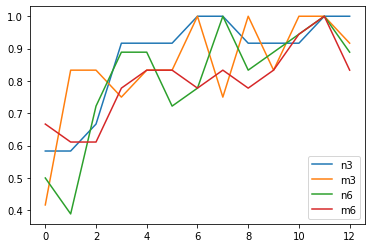

In [7]:
pd.DataFrame(p).plot()
